In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#df = pd.read_csv('model_features_weekend2_classic_historical.csv')
df = pd.read_csv('model_features_weekend2_classic_historical_reduced.csv')
print(df.shape)
df.head()

(180, 19)


,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,ovr_rating_bpi,ovr_rating_torvik,wab,off_rating_bpi,off_rating_kenpom,off_rating_torvik,efg%_def,2p%_def,bench,adj_tempo,a_b
0,2008,East,Sweet 16,1,2008 North Carolina,4,2008 Washington St.,1,5.9,0.031320,6.988816,6.0,12.422929,11.187568,-6.4,-5.9,8.98,16.6,0
1,2008,East,Elite Eight,1,2008 North Carolina,3,2008 Louisville,1,4.1,0.021481,7.155627,10.1,7.857259,5.838781,-4.0,-5.5,-2.34,8.9,0
2,2008,East,Sweet 16,3,2008 Louisville,2,2008 Tennessee,1,0.0,0.000440,-4.453270,4.3,7.060448,1.867069,-9.0,-9.4,-1.12,-5.8,0
3,2008,Midwest,Sweet 16,1,2008 Kansas,12,2008 Villanova,1,12.9,0.172373,9.584399,9.0,17.181194,15.658608,-4.2,-6.8,-7.91,-0.2,0
4,2008,Midwest,Elite Eight,1,2008 Kansas,10,2008 Davidson,1,7.1,0.086792,8.418377,7.1,14.484217,12.219711,-9.6,-13.7,-1.43,0.1,0


In [69]:
df2 = df.drop(columns=['year', 
                       'region', 
                       'round', 
                       'high_bracket_seed', 
                       'high_bracket_team', 
                       'low_bracket_seed', 
                       'low_bracket_team'
                      ])
print(df2.shape)
df2.head()

(180, 12)


,win,ovr_rating_bpi,ovr_rating_torvik,wab,off_rating_bpi,off_rating_kenpom,off_rating_torvik,efg%_def,2p%_def,bench,adj_tempo,a_b
0,1,5.9,0.031320,6.988816,6.0,12.422929,11.187568,-6.4,-5.9,8.98,16.6,0
1,1,4.1,0.021481,7.155627,10.1,7.857259,5.838781,-4.0,-5.5,-2.34,8.9,0
2,1,0.0,0.000440,-4.453270,4.3,7.060448,1.867069,-9.0,-9.4,-1.12,-5.8,0
3,1,12.9,0.172373,9.584399,9.0,17.181194,15.658608,-4.2,-6.8,-7.91,-0.2,0
4,1,7.1,0.086792,8.418377,7.1,14.484217,12.219711,-9.6,-13.7,-1.43,0.1,0


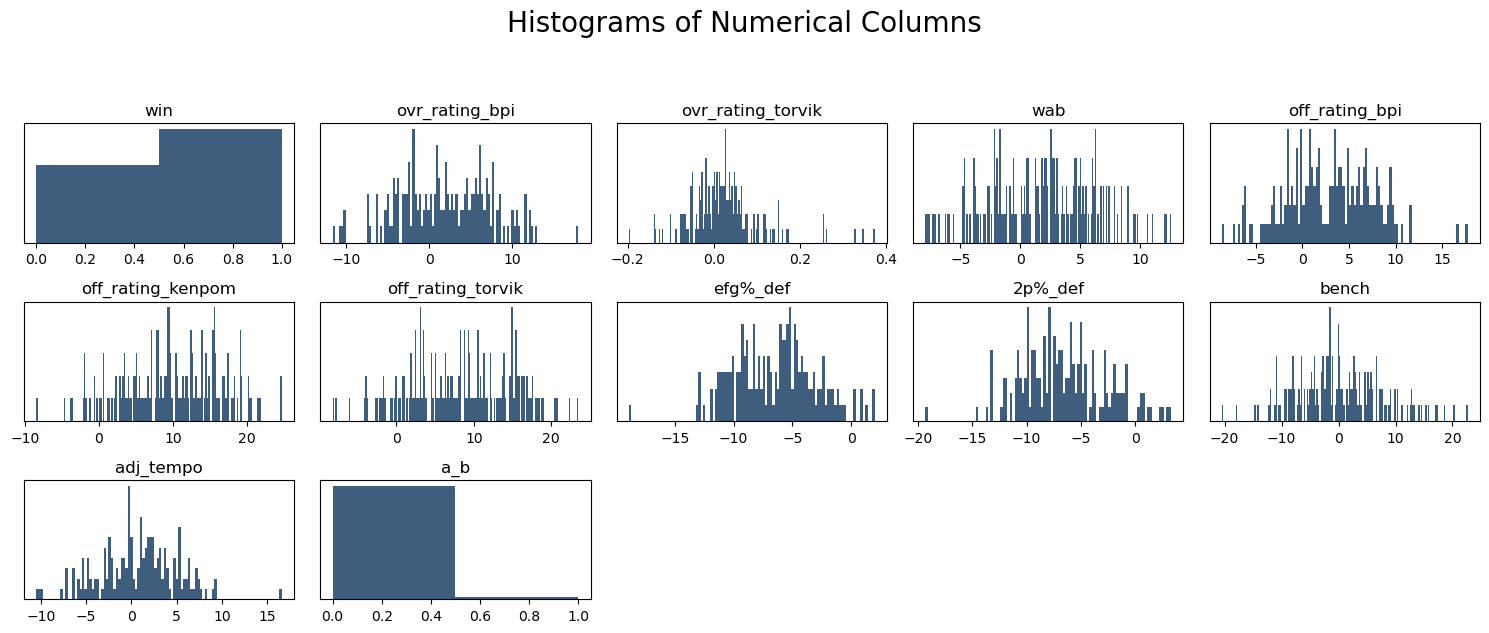

In [70]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, df2.shape[1]+1):
    plt.subplot(6,5,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
    
    vals = np.size(df2.iloc[:,i-1].unique())
    plt.hist(df2.iloc[:,i-1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])

<Axes: title={'center': 'Correlation with the Response Variable'}>

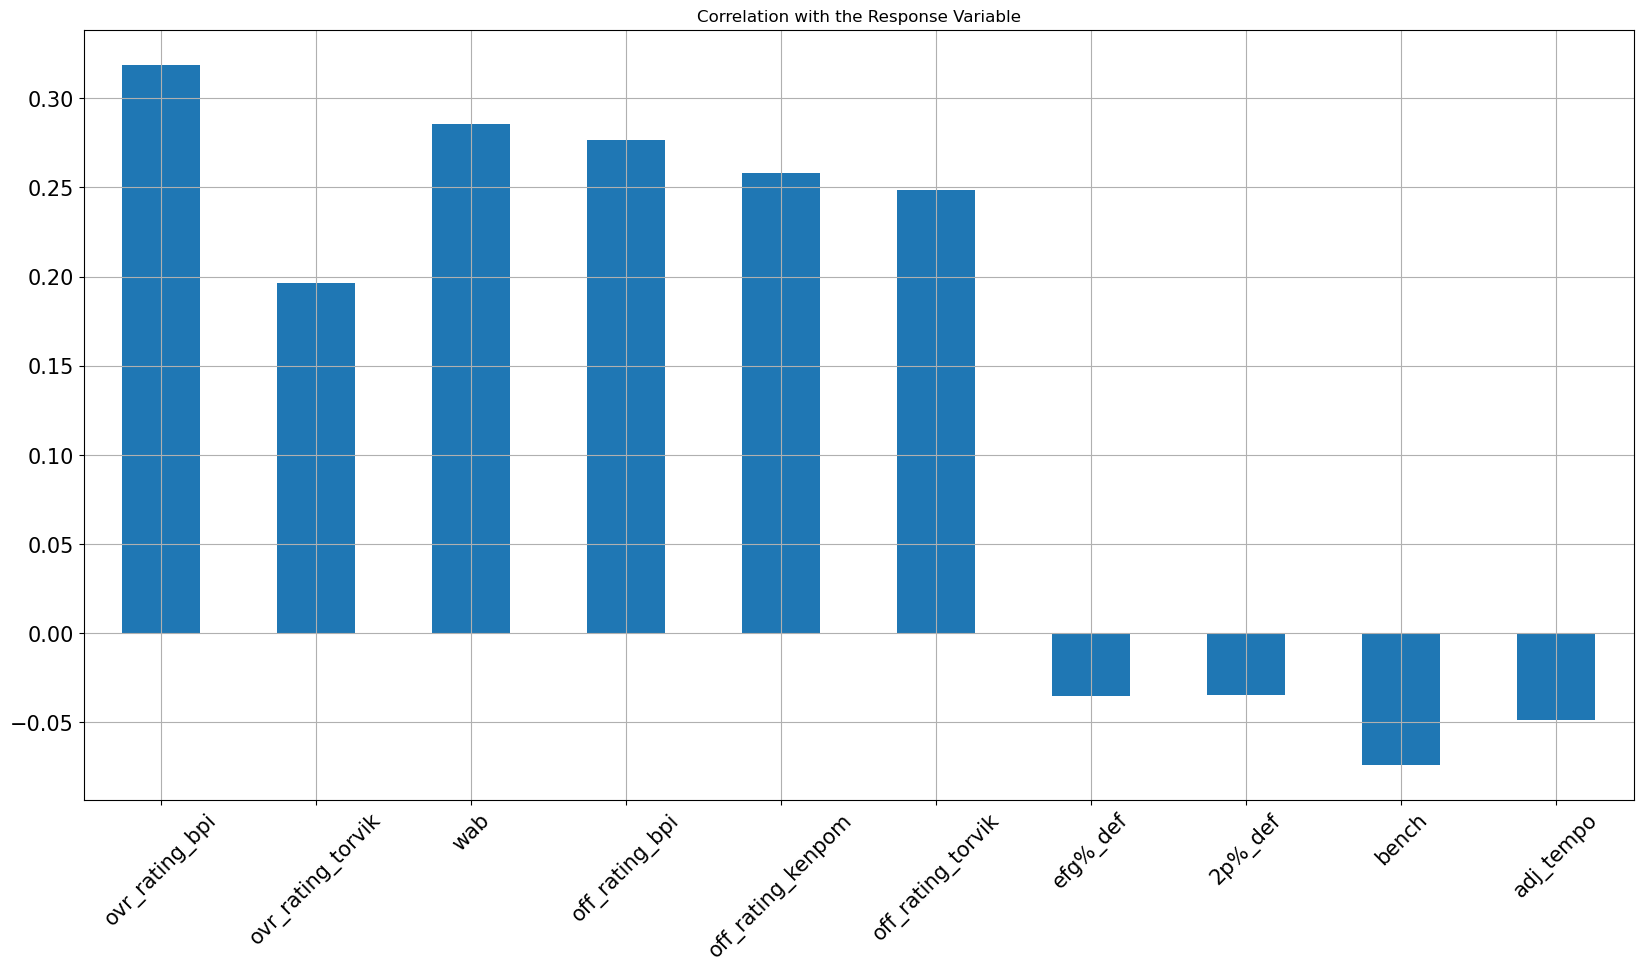

In [71]:
df2.drop(columns=['win', 'a_b']).corrwith(df2.win).plot.bar(
    figsize=(20,10), title='Correlation with the Response Variable', fontsize=15,
    rot=45, grid=True
)

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns='win'),
                                                    df2['win'],
                                                    test_size=0.2,
                                                    random_state=0
                                                   )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(144, 11)
(144,)
(36, 11)
(36,)


In [73]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

# I. Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [75]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  0.6666666666666666
Accuracy Test:  0.5833333333333334
Precision Train:  0.6915887850467289
Precision Test:  0.56
Recall Train:  0.8314606741573034
Recall Test:  0.7777777777777778
F1 Train:  0.7551020408163265
F1 Test:  0.6511627906976745
ROC_AUC Train:  0.6157303370786518
ROC_AUC Test:  0.5833333333333333


### Way below expectation

# II. RFE Logistic Regression

In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(clf, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=10)

In [78]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

In [79]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  0.6666666666666666
Accuracy Test:  0.5833333333333334
Precision Train:  0.6915887850467289
Precision Test:  0.56
Recall Train:  0.8314606741573034
Recall Test:  0.7777777777777778
F1 Train:  0.7551020408163265
F1 Test:  0.6511627906976745
ROC_AUC Train:  0.6157303370786518
ROC_AUC Test:  0.5833333333333333


In [80]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns=['features']),
           pd.DataFrame(np.transpose(clf.coef_), columns=['coef'])],
           axis=1)

,features,coef
0,ovr_rating_bpi,0.784644
1,ovr_rating_torvik,-0.750726
2,wab,0.536815
3,off_rating_bpi,0.092146
4,off_rating_kenpom,0.158899
5,off_rating_torvik,-0.081050
6,efg%_def,0.190576
7,2p%_def,-0.288468
8,adj_tempo,-0.011674
9,a_b,-0.241645


### Not much difference

# III. Lasso Regression

In [81]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [82]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 11
selected features: 7
features with coefficients shrank to zero: 4


In [83]:
selected_feat

Index(['ovr_rating_bpi', 'ovr_rating_torvik', 'wab', 'off_rating_bpi',
       'off_rating_kenpom', '2p%_def', 'adj_tempo'],
      dtype='object')

In [84]:
X_train2 = X_train[['ovr_rating_bpi', 'ovr_rating_torvik', 'wab', 'off_rating_bpi',
                    'off_rating_kenpom', '2p%_def', 'adj_tempo']]
X_test2 = X_test[['ovr_rating_bpi', 'ovr_rating_torvik', 'wab', 'off_rating_bpi',
                  'off_rating_kenpom', '2p%_def', 'adj_tempo']]


clf = LogisticRegression(random_state=0)
clf.fit(X_train2, y_train)

LogisticRegression(random_state=0)

In [85]:
y_pred_train = clf.predict(X_train2)
y_pred_test = clf.predict(X_test2)

In [86]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test)) 

Accuracy Train:  0.6388888888888888
Accuracy Test:  0.5555555555555556
Precision Train:  0.6796116504854369
Precision Test:  0.5384615384615384
Recall Train:  0.7865168539325843
Recall Test:  0.7777777777777778
F1 Train:  0.7291666666666666
F1 Test:  0.6363636363636364
ROC_AUC Train:  0.5932584269662922
ROC_AUC Test:  0.5555555555555556


# IV. SVM

In [87]:
from sklearn.svm import SVC

clf = SVC(random_state=0, kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [88]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [89]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  0.6944444444444444
Accuracy Test:  0.5833333333333334
Precision Train:  0.6859504132231405
Precision Test:  0.5517241379310345
Recall Train:  0.9325842696629213
Recall Test:  0.8888888888888888
F1 Train:  0.7904761904761904
F1 Test:  0.6808510638297872
ROC_AUC Train:  0.6208375893769151
ROC_AUC Test:  0.5833333333333333


# V. Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [91]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [92]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  1.0
Accuracy Test:  0.6666666666666666
Precision Train:  1.0
Precision Test:  0.625
Recall Train:  1.0
Recall Test:  0.8333333333333334
F1 Train:  1.0
F1 Test:  0.7142857142857143
ROC_AUC Train:  1.0
ROC_AUC Test:  0.6666666666666667


# VI. Full DF

In [93]:
comp_df = df[['year', 
              'region', 
              'round', 
              'high_bracket_seed', 
              'high_bracket_team',
              'low_bracket_seed', 
              'low_bracket_team', 
              'win']]
              
df = df.drop(columns=['year', 
                      'region', 
                      'round', 
                      'high_bracket_seed', 
                      'high_bracket_team',
                      'low_bracket_seed', 
                      'low_bracket_team', 
                      'win'
                     ])
log_pred = rfe.predict(df)
comp_df['log_pred'] = log_pred
comp_df['log_comp'] = comp_df['win'] - comp_df['log_pred']
rf_pred = clf.predict(df)
comp_df['rf_pred'] = rf_pred
comp_df['rf_comp'] = comp_df['win'] - comp_df['rf_pred']

In [95]:
pd.set_option('display.max_rows', None)
comp_df

,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,log_pred,log_comp,rf_pred,rf_comp
0,2008,East,Sweet 16,1,2008 North Carolina,4,2008 Washington St.,1,1,0,1,0
1,2008,East,Elite Eight,1,2008 North Carolina,3,2008 Louisville,1,1,0,1,0
2,2008,East,Sweet 16,3,2008 Louisville,2,2008 Tennessee,1,1,0,1,0
3,2008,Midwest,Sweet 16,1,2008 Kansas,12,2008 Villanova,1,1,0,1,0
4,2008,Midwest,Elite Eight,1,2008 Kansas,10,2008 Davidson,1,1,0,1,0
5,2008,Midwest,Sweet 16,3,2008 Wisconsin,10,2008 Davidson,0,1,-1,1,-1
6,2008,South,Sweet 16,1,2008 Memphis,5,2008 Michigan St.,1,1,0,1,0
7,2008,South,Elite Eight,1,2008 Memphis,2,2008 Texas,1,1,0,1,0
8,2008,South,Sweet 16,3,2008 Stanford,2,2008 Texas,0,1,-1,1,-1
9,2008,West,Sweet 16,1,2008 UCLA,12,2008 Western Kentucky,1,1,0,1,0


### The goal is 67% and this is 65.6%. Gradient boosting should be able to raise this.